In [ ]:
import cv2 as cv #imports p/ processamento de img
import matplotlib.pyplot as plt 
import numpy as np 

Importação pelo colab

In [ ]:
from google.colab import files #importação pelo colab 
importados = files.upload()
print ("arquivos importados:")
print(*importados, sep="\n")

Saving eu.jpeg to eu.jpeg
arquivos importados:
eu.jpeg


In [ ]:
imagem = cv.imread("eu.jpeg") #lendo a imagem

In [ ]:
def mostrar_imagem(imagem): #mostrar imagem com matplot
  imagem_rgb = cv.cvtColor(imagem, cv.COLOR_BGR2RGB) #padrão de cor do OpenCV é BGR, então convertemos
  plt.imshow(imagem_rgb)

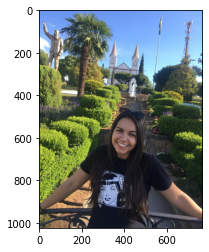

In [ ]:
mostrar_imagem(imagem)

Pré-processamento de imagens para 

---

diminuir os ruídos e reconhecer faces

In [ ]:
imagem_cinza = cv.cvtColor(imagem, cv.COLOR_BGR2GRAY)

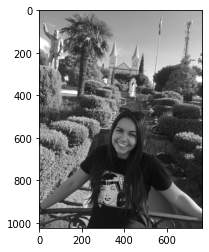

In [ ]:
mostrar_imagem(imagem_cinza)

Método cascade classifier - algoritmo viola jones para detectar faces

In [ ]:
features_haar = "haarcascade_frontalface_alt2.xml" #Open CV -> coleção de arquivos xml -> detectar faces frontais

In [ ]:
caminho = f"{cv.haarcascades}/{features_haar}" #caminho até a localização exata dos aqv features de haar

In [ ]:
classificador = cv.CascadeClassifier(caminho) #modelo de classificação passando as features de haar como parâmetros

In [ ]:
faces = classificador.detectMultiScale(imagem_cinza) #predição -> retorna um array de coordenadas com a locali dos rostos encontrados 

In [ ]:
imagem_copia = np.array(imagem) #cópia do array

In [ ]:
for x,y,w,h in faces: 
  cv.rectangle(imagem_copia, (x,y), (x+w, y+h), (0,255,0), 2) 

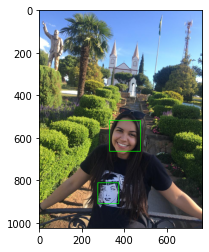

In [ ]:
mostrar_imagem(imagem_copia)

Padronização

In [ ]:
imagens_cortadas = list() 

In [ ]:
for x,y,w,h in faces: #percorrer array de faces encontradas
  face = imagem[y:y+h, x:x+w] #slice do ponto y até h e do x até w
  face = cv.resize(face, (160,160))
  imagens_cortadas.append(face)

In [ ]:
len(imagens_cortadas)

2

In [ ]:
for img in imagens_cortadas: 
  print(img.shape)

(160, 160, 3)
(160, 160, 3)


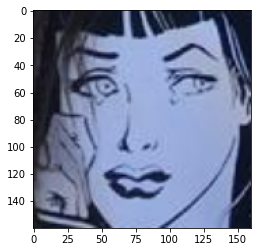

In [ ]:
mostrar_imagem(imagens_cortadas[1]) 

Salvando as img em um diretório 

In [ ]:
import os 

In [ ]:
def salvar_imagens(imagens, caminho):
  if not os.path.exists(caminho):
    os.mkdir(caminho)

  index = len(os.listdir(caminho)) #tamanho da lista de todos os arquivos no caminho

  for imagem in imagens:
    index +=1
    cv.imwrite(f"{caminho}/{index}.jpg", imagem) #escreve um caminho com a nossa imagem 
    

In [ ]:
salvar_imagens(imagens_cortadas, "/content/drive/MyDrive/IFC/IA/maskoff-teste")

treinamento do modelo (biblioteca sklearn e algoritmo knn)

In [ ]:
import cv2 as cv
import numpy as np
import pandas as pd
import os 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
import re

def carrega_dataframe(): 
  dados = { #criacao do dicionário dados
      "ARQUIVO": [],
      "ROTULO": [],
      "ALVO": [],
  }

  caminho_com_mascara = "/content/drive/MyDrive/IFC/IA/maskon" #ja recortado e padronizado
  caminho_sem_mascara = "/content/drive/MyDrive/IFC/IA/maskoff"

  com_mascara = os.listdir(caminho_com_mascara) #lista dos arquivos de cada diretório
  sem_mascara = os.listdir(caminho_sem_mascara)

  for arquivo in com_mascara: #percorrer todos os arquivo e salvar no dicionário
    aux1 = re.sub('[\s+]', '', f"{caminho_com_mascara}/{arquivo}")
    dados["ARQUIVO"].append(aux1) #salvando o caminho do arquivo
    dados["ROTULO"].append(f"Com mascara")
    dados["ALVO"].append(1)

  for arquivo in sem_mascara:
    aux2 = re.sub('[\s+]', '', f"{caminho_sem_mascara}/{arquivo}")
    dados["ARQUIVO"].append(aux2)
    dados["ROTULO"].append(f"Sem mascara")
    dados["ALVO"].append(0)

  dataframe = pd.DataFrame(dados) #criação de um dataframe do pandas passando os dados

  return dataframe

    

In [ ]:
dados = carrega_dataframe()

In [ ]:
dados.to_csv("/content/drive/MyDrive/IFC/IA/testandooo.csv") #salvar como csv

In [ ]:
dados = pd.read_csv("/content/drive/MyDrive/IFC/IA/testandooo.csv")

In [ ]:
dados.head()

,Unnamed: 0,ARQUIVO,ROTULO,ALVO
0,0,/content/drive/MyDrive/IFC/IA/maskon/282.png,Com mascara,1
1,1,/content/drive/MyDrive/IFC/IA/maskon/285.png,Com mascara,1
2,2,/content/drive/MyDrive/IFC/IA/maskon/273.jpeg,Com mascara,1
3,3,/content/drive/MyDrive/IFC/IA/maskon/38.jpg,Com mascara,1
4,4,/content/drive/MyDrive/IFC/IA/maskon/68.jpg,Com mascara,1


In [ ]:
def ler_imagens(dados):
  arquivos = dados["ARQUIVO"] #primeira coluna
  imagens = list()

  for arquivo in arquivos:
    image = cv.imread(arquivo)
    imagem_aa = cv.cvtColor(image, cv.COLOR_BGR2GRAY).flatten() #vetor
    imagens.append(imagem_aa)

  dados["IMAGEM"] = imagens #nova coluna com vetor das imagens lidas


In [ ]:
ler_imagens(dados)

In [ ]:
dados.head()

,Unnamed: 0,ARQUIVO,ROTULO,ALVO,IMAGEM
0,0,/content/drive/MyDrive/IFC/IA/maskon/282.png,Com mascara,1,"[217, 217, 169, 175, 74, 64, 66, 49, 61, 50, 5..."
1,1,/content/drive/MyDrive/IFC/IA/maskon/285.png,Com mascara,1,"[49, 60, 76, 89, 98, 108, 110, 117, 125, 130, ..."
2,2,/content/drive/MyDrive/IFC/IA/maskon/273.jpeg,Com mascara,1,"[181, 160, 137, 103, 69, 51, 37, 43, 54, 63, 6..."
3,3,/content/drive/MyDrive/IFC/IA/maskon/38.jpg,Com mascara,1,"[254, 239, 247, 255, 255, 254, 253, 249, 245, ..."
4,4,/content/drive/MyDrive/IFC/IA/maskon/68.jpg,Com mascara,1,"[203, 205, 206, 205, 203, 195, 177, 160, 168, ..."


In [ ]:
X = list(dados["IMAGEM"]) #característica
y = list(dados["ALVO"]) #classe para id.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.99, random_state=13) 

In [ ]:
pca = PCA(n_components=30) #refinamento das características -> extrai as características mais notáveis
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_train = pca.transform(X_train) #transforma as entradas em vetores de tamanho 30 filtrados a partir do modelo pca
X_test = pca.transform(X_test)

treinamento knn e estratégia grid search


In [ ]:
parametros = { #lista de opções
    "n_neighbors": [2,3,5,11,19,23,29], #ímpares para não haver empate de "votação"
    "weights": ["uniform", "distance"],
    "metric": ["eucliddean", "manhattam", "cosine", "l1", "l2"] #distâncias
}

In [ ]:
knn = GridSearchCV(KNeighborsClassifier(), parametros) #instância de grid e modelo vazio knn e o parametro p/ escolher os melhores

In [ ]:
knn.fit(X_train, y_train) #treinamento do knn

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['eucliddean', 'manhattam', 'cosine', 'l1',
                                    'l2'],
                         'n_neighbors': [2, 3, 5, 11, 19, 23, 29],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

métricas de desempenho

In [ ]:
knn.score(X=X_test, y=y_test) #precisão média nos dados de teste e rótulos fornecidos.

0.9230769230769231

In [ ]:
predicao = knn.predict(X_test)

In [ ]:
verdadeiros_positivos, falsos_positivos, falsos_negativos, verdadeiros_negativos = confusion_matrix(y_test, predicao).ravel()

In [ ]:
verdadeiros_positivos, verdadeiros_negativos

(10, 2)

In [ ]:
falsos_positivos, falsos_negativos

(0, 1)

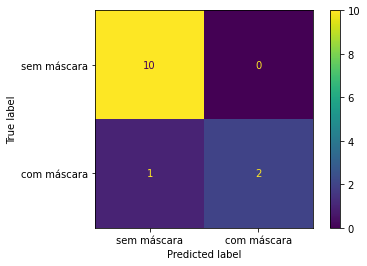

In [ ]:
#matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
cmx = confusion_matrix(y_test, predicao)
cmd = ConfusionMatrixDisplay(cmx, display_labels=['sem máscara','com máscara'])
cmd.plot(values_format='d')

In [ ]:
acc = (verdadeiros_positivos + verdadeiros_negativos) / (verdadeiros_positivos + verdadeiros_negativos + falsos_positivos + falsos_negativos)

In [ ]:
print(acc)

0.9230769230769231


Testagem

In [ ]:
from google.colab import files #importação pelo colab 
importados = files.upload()
print ("arquivos importados:")
print(*importados, sep="\n")

Saving p1.jpg to p1.jpg
Saving p2.png to p2.png
arquivos importados:
p1.jpg
p2.png


In [ ]:
classificador = cv.CascadeClassifier(f"{cv.haarcascades}/haarcascade_frontalface_alt2.xml") #reconhecimento das faces

In [ ]:
def processar_imagem(pca, classificador, imagem):
  img = cv.imread(imagem)
  imagem_cinza = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  faces = classificador.detectMultiScale(img) #id. faces
  vetores = list() #guardar images vetorizadas
  cont = 0
  fig = plt.figure(figsize=(10,10))
  for x,y,w,h in faces:
    face_cortada = imagem_cinza[y:y+h, x:x+w]
    fig.add_subplot(3, 3, cont+1) #mostrar as imagens no subplot
    plt.imshow(cv.cvtColor(face_cortada, cv.COLOR_BGR2RGB))
    cont+=1 #possivel adicionar um novo subplot na prox. iteração
    face_cortada = cv.resize(face_cortada, (160,160))
    vetor = face_cortada.flatten() #vetorizar a img e add.
    vetores.append(vetor)

  plt.show()
  return vetores

In [ ]:
classes = { #dicionário com predições
    0: "Sem máscara",
    1: "Com máscara"
}

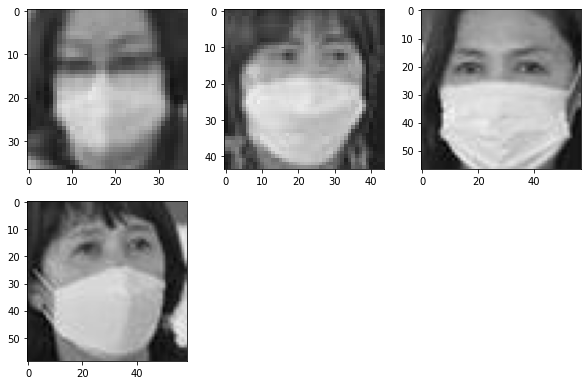

Com máscara . Com máscara . Com máscara . Com máscara


In [ ]:
vetores = processar_imagem(pca, classificador, "p1.jpg")
c = knn.predict(pca.transform(vetores))

print(*[classes[e] for e in c], sep=" . ")

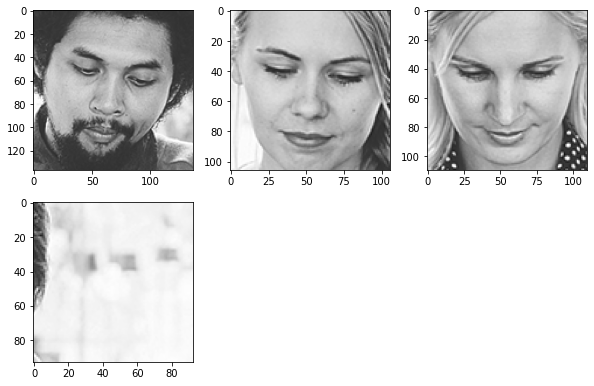

Sem máscara . Sem máscara . Sem máscara . Com máscara


In [ ]:
vetores = processar_imagem(pca, classificador, "p2.png")
c = knn.predict(pca.transform(vetores))

print(*[classes[e] for e in c], sep=" . ")

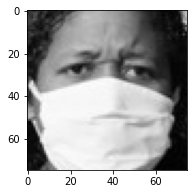

Com máscara


In [ ]:
vetores = processar_imagem(pca, classificador, "p5.jpg")
c = knn.predict(pca.transform(vetores))

print(*[classes[e] for e in c], sep=" . ")

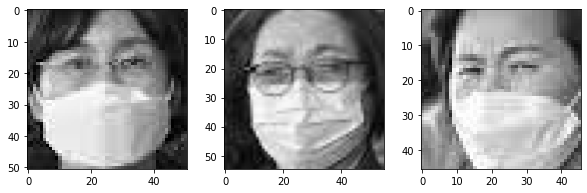

Com máscara . Com máscara . Com máscara


In [ ]:
vetores = processar_imagem(pca, classificador, "p7.jpg")
c = knn.predict(pca.transform(vetores))

print(*[classes[e] for e in c], sep=" . ")

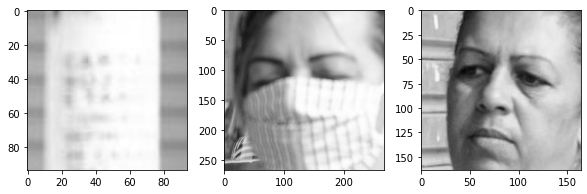

Com máscara . Com máscara . Sem máscara


In [ ]:
vetores = processar_imagem(pca, classificador, "p11.jpg")
c = knn.predict(pca.transform(vetores))

print(*[classes[e] for e in c], sep=" . ")

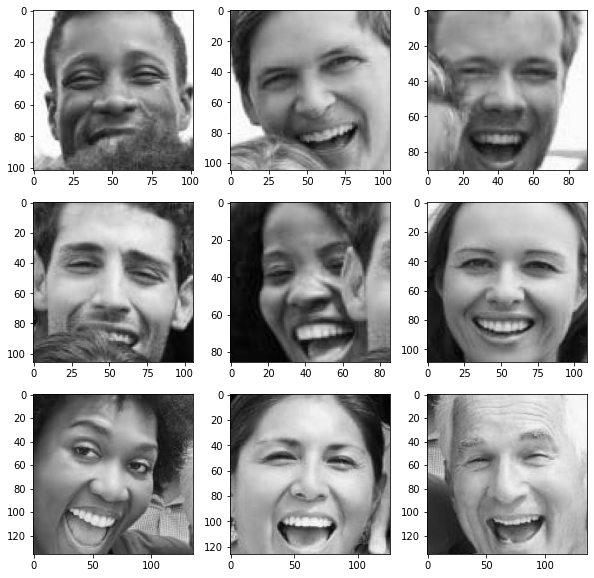

Sem máscara . Sem máscara . Sem máscara . Sem máscara . Sem máscara . Sem máscara . Sem máscara . Sem máscara . Sem máscara


In [ ]:
vetores = processar_imagem(pca, classificador, "p12.jpg")
c = knn.predict(pca.transform(vetores))

print(*[classes[e] for e in c], sep=" . ")